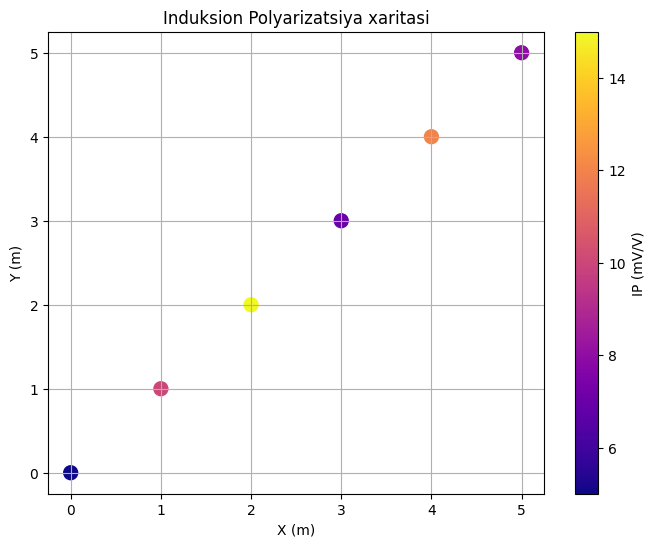

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Namuna malumotlarini yaratish
data = {
    'X': [0, 1, 2, 3, 4, 5],
    'Y': [0, 1, 2, 3, 4, 5],
    'IP': [5, 10, 15, 7, 12, 8]
}

# DataFrame yaratish
df = pd.DataFrame(data)

# Ma'lumotlarni CSV fayliga saqlash
df.to_csv('ip_data.csv', index=False)

# 2. IP koeffitsienti grafikasi
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['IP'], cmap='plasma', s=100)
plt.colorbar(label='IP (mV/V)')
plt.title('Induksion Polyarizatsiya xaritasi')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()

plt.show()           

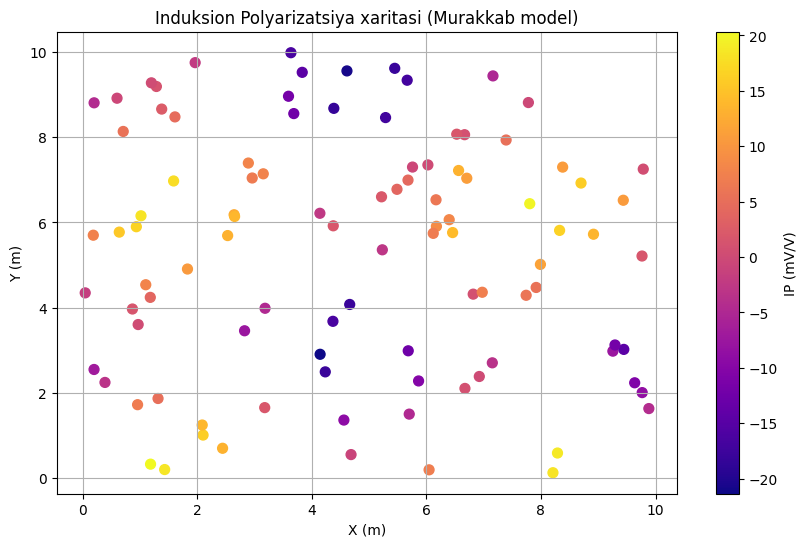

Modelning koeffitsientlari: [-0.3692242  -0.60285446]
Modelning kesishishi: 6.572961899283961


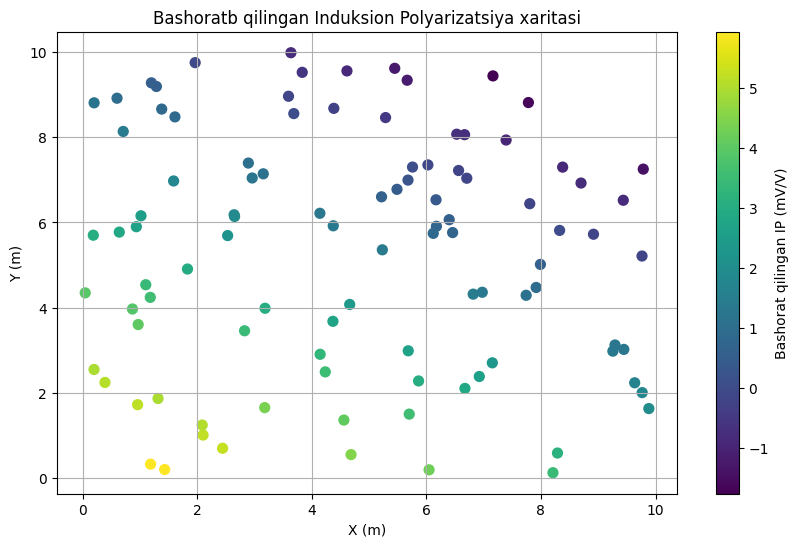

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Namuna ma'lumotlarimi kiritish
np.random.seed(0)  # Tasodifiy sonlarni qayta ishlab chiqarish uchun 
num_points = 100
X = np.random.uniform(0, 10, num_points)
Y = np.random.uniform(0, 10, num_points)

#IP qiymatlarini tasodifiy ravishda yaratish ( bunga model qo'shilishi mumkin)
true_resistivity = 10 * np.sin(X) + 10 * np.cos(Y) # raqamli model
IP = true_resistivity + np.random.normal(0, 2, num_points) # shovqin qo'shish

# dataFrame yaratish
df = pd.DataFrame({'X': X, 'Y': Y, 'IP': IP})

# 2. IP koeffitsienti grafikasi
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['IP'], cmap='plasma', s=50)
plt.colorbar(label='IP (mV/V)')
plt.title('Induksion Polyarizatsiya xaritasi (Murakkab model)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()
plt.show()

# 3.  IP va Resitivite o'rtasida Liner Regressiya 
X_reg = df[['X', 'Y']]
y_reg = df['IP']

model = LinearRegression()
model.fit(X_reg,y_reg)

# 4. Modelning koeffitsiyentlarini chiqarish 
print(f"Modelning koeffitsientlari: {model.coef_}")
print(f"Modelning kesishishi: {model.intercept_}")

# 5.  Modeldan IP ni bashorat qilish
df['Predicted_IP'] = model.predict(X_reg)


# 6. bashorat qilingan Ip grafikasi
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['Y'], c=df['Predicted_IP'], cmap='viridis', s=50)
plt.colorbar(label='Bashorat qilingan IP (mV/V)')
plt.title('Bashoratb qilingan Induksion Polyarizatsiya xaritasi')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()
plt.show() 







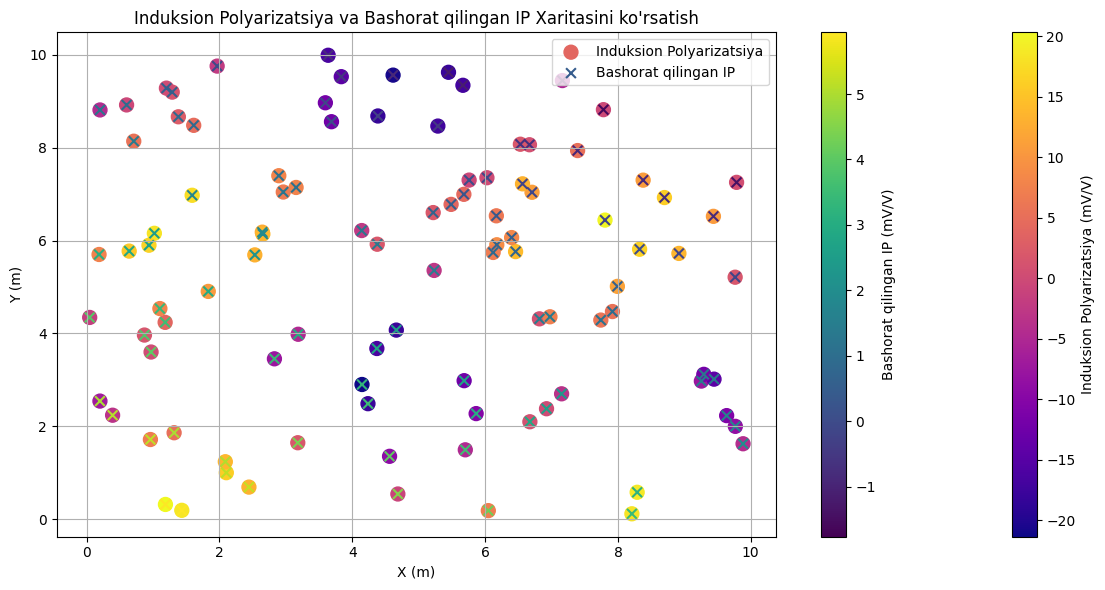

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Namuna ma'lumotlarimi kiritish
np.random.seed(0)  # Tasodifiy sonlarni qayta ishlab chiqarish uchun 
num_points = 100
X = np.random.uniform(0, 10, num_points)
Y = np.random.uniform(0, 10, num_points)

#IP qiymatlarini tasodifiy ravishda yaratish
true_resistivity = 10 * np.sin(X) + 10 * np.cos(Y) # raqamli model
IP = true_resistivity + np.random.normal(0, 2, num_points) # shovqin qo'shish

# DataFrame yaratish
df = pd.DataFrame({'X': X, 'Y': Y, 'IP': IP})

# 2. IP va bashorat qilingan IP grafikasi
X_reg = df[['X', 'Y']]
y_reg = df['IP']

model = LinearRegression()
model.fit(X_reg, y_reg)

# Bashorat qilingan  IP ni hisoblash
df['Predicted_IP'] = model.predict(X_reg)


# grafikni chizish
plt.figure(figsize=(12, 6))

# Induksion polyarizatsiya xaritasi
scatter1 = plt.scatter(df['X'], df['Y'], c=df['IP'], cmap='plasma', s=100, label='Induksion Polyarizatsiya')
# Bashoratb qilingan IP
scatter2 = plt.scatter(df['X'], df['Y'], c=df['Predicted_IP'], cmap='viridis', s=50, marker='x', label='Bashorat qilingan IP')


# Grafik ko'rsatkichlari
plt.title('Induksion Polyarizatsiya va Bashorat qilingan IP Xaritasini ko\'rsatish')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.colorbar(scatter1, label='Induksion Polyarizatsiya (mV/V)')
plt.colorbar(scatter2, label='Bashorat qilingan IP (mV/V)', ax=plt.gca())
plt.grid()
plt.legend()
plt.tight_layout()
plt.show() 


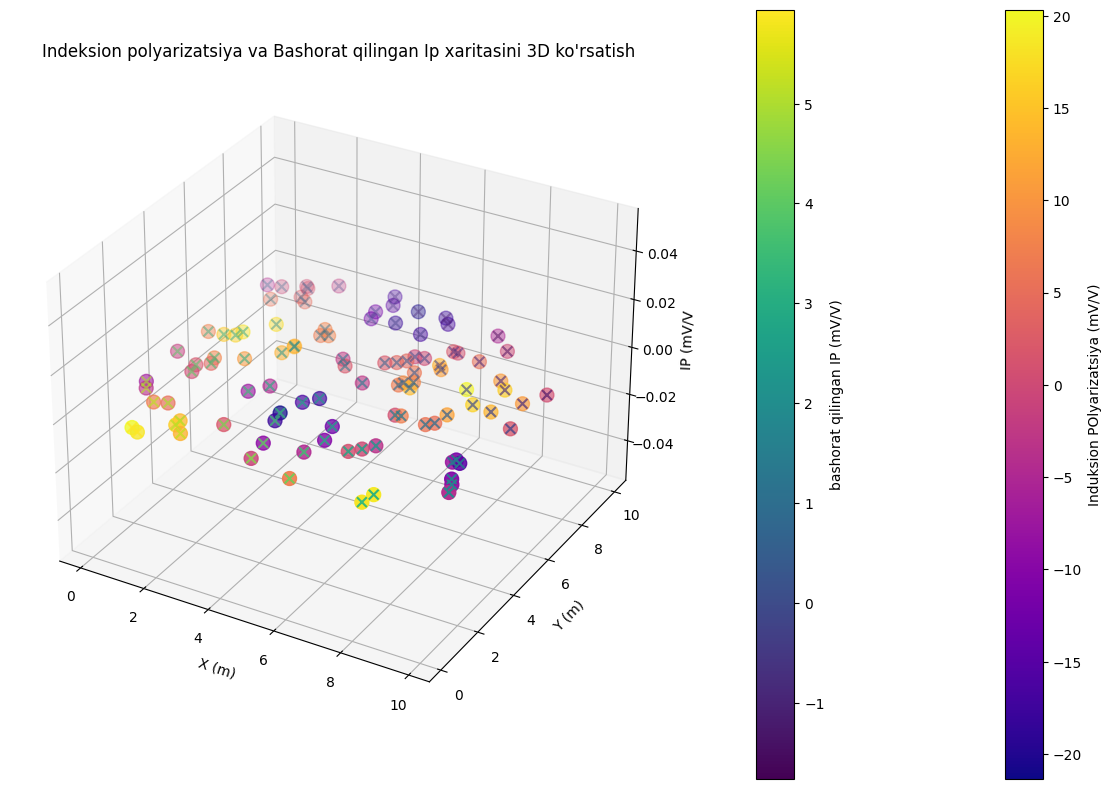

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# 1. Namuna ma'lumotlarimi kiritish
np.random.seed(0)  # Tasodifiy sonlarni qayta ishlab chiqarish uchun 
num_points = 100
X = np.random.uniform(0, 10, num_points)
Y = np.random.uniform(0, 10, num_points)

#IP qiymatlarini tasodifiy ravishda yaratish
true_resistivity = 10 * np.sin(X) + 10 * np.cos(Y) # raqamli model
IP = true_resistivity + np.random.normal(0, 2, num_points) # shovqin qo'shish

# DataFrame yaratish
df = pd.DataFrame({'X': X, 'Y': Y, 'IP': IP})

# 2. IP va bashorat qilingan IP grafikasi
X_reg = df[['X', 'Y']]
y_reg = df['IP']

model = LinearRegression()
model.fit(X_reg, y_reg)

# Bashorat qilingan  IP ni hisoblash
df['Predicted_IP'] = model.predict(X_reg)

# 3D xaritani chizish 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Induksion polyarizatsiya xaritasi
scatter1 = ax.scatter(df['X'], df['Y'], c=df['IP'], cmap='plasma', s=100, label='Induksion Polyarizatsiya')

# Bashorat qilingan IP
scatter2 = ax.scatter(df['X'], df['Y'], c=df['Predicted_IP'], cmap='viridis', s=50, marker='x', label='Bashorat qilingan IP')

# O'q nomlarini qo'shish
ax.set_title('Indeksion polyarizatsiya va Bashorat qilingan Ip xaritasini 3D ko\'rsatish')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('IP (mV/V')

# Rangli shkalalarni qo'shish
cbar1 = plt.colorbar(scatter1, ax=ax, pad=0.1, label='Induksion POlyarizatsiya (mV/V)')
cbar2 = plt.colorbar(scatter2, ax=ax, pad=0.1, label='bashorat qilingan IP (mV/V)')

plt.tight_layout()
plt.show()






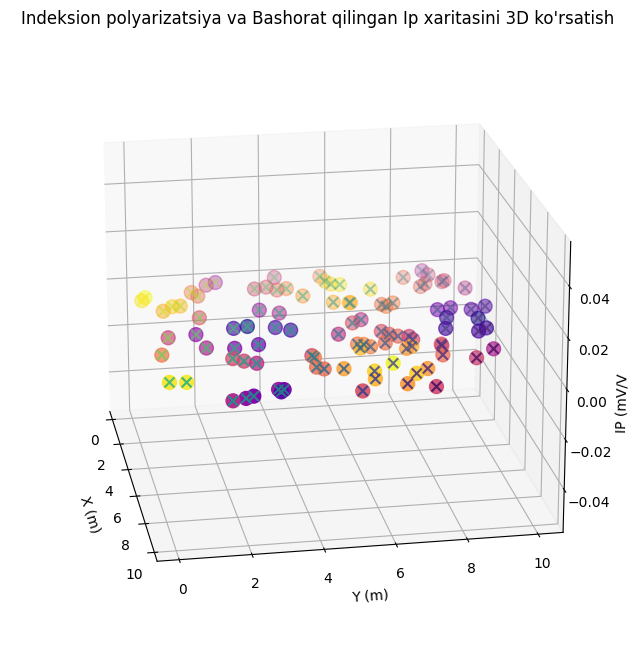

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# 1. Namuna ma'lumotlarimi kiritish
np.random.seed(0)  # Tasodifiy sonlarni qayta ishlab chiqarish uchun 
num_points = 100
X = np.random.uniform(0, 10, num_points)
Y = np.random.uniform(0, 10, num_points)

#IP qiymatlarini tasodifiy ravishda yaratish
true_resistivity = 10 * np.sin(X) + 10 * np.cos(Y) # raqamli model
IP = true_resistivity + np.random.normal(0, 2, num_points) # shovqin qo'shish

# DataFrame yaratish
df = pd.DataFrame({'X': X, 'Y': Y, 'IP': IP})

# 2. IP va bashorat qilingan IP grafikasi
X_reg = df[['X', 'Y']]
y_reg = df['IP']

model = LinearRegression()
model.fit(X_reg, y_reg)

# Bashorat qilingan  IP ni hisoblash
df['Predicted_IP'] = model.predict(X_reg)

# video yaratish
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Induksion polyarizatsiya xaritasi
scatter1 = ax.scatter(df['X'], df['Y'], c=df['IP'], cmap='plasma', s=100)

# Bashorat qilingan IP
scatter2 = ax.scatter(df['X'], df['Y'], c=df['Predicted_IP'], cmap='viridis', s=50, marker='x')

ax.set_title('Indeksion polyarizatsiya va Bashorat qilingan Ip xaritasini 3D ko\'rsatish')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('IP (mV/V')

def update(frame):
    ax.view_init(elev=20, azim=frame * (360 / 36))
# Animatsiyani yaratish
ani = FuncAnimation(fig, update, frames=36, interval=100)

# Jupyter Notebookda animatsiyani ko'rsatish
HTML(ani.to_jshtml())


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Ma'lumotlarni yuklash
data = pd.read_csv('ip_data.csv') # CSV faylini yuklash
print(data.head()) # Birinchi 5 qatorni ko'rsatish

# 2. Tahlil
# Resistivite va IP koeffitsientining o'rtacha qiymatlari
avg_resistivity = data['Resistivity'].mean()
avg_ip = data['IP'].mean()
print(f"O'rtacha Resistivite: {avg_resistivity:.2f} Ohm·m")
print(f"O'rtacha IP: {avg_ip:.2f} mV/V")

# 3. Grafiklar
plt.figure(figsize=(12, 6))

# Resistivite grafikasi
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['Y'], c=data['Resistivity'], cmap='viridis', s=50)
plt.colorbar(label='Resistivite (Ohm·m)')
plt.title('Resistivite xaritasi')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

# IP koeffitsienti grafikasi
plt.subplot(1, 2, 2)
plt.scatter(data['X'], data['Y'], c=data['IP'], cmap='plasma', s=50)
plt.colorbar(label='IP (mV/V)')
plt.title('Induksion Polyarizatsiya xaritasi')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

plt.tight_layout()
plt.show()


   X  Y  IP
0  0  0   5
1  1  1  10
2  2  2  15
3  3  3   7
4  4  4  12


<class 'KeyError'>: 'Resistivity'